<a href="https://colab.research.google.com/github/Roshani-Abeysekera/Forecasting-Monthly-Dengue-Cases-Using-Climatic-Factors-In-Colombo-District-With-Machine-Learning./blob/main/LinearRegression_Dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


import tensorflow as tf
from xgboost import XGBRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM , Dropout

%matplotlib inline
from IPython.display import HTML
from numpy import *

from google.colab import files
data_to_load = files.upload()

Saving dengue.csv to dengue (1).csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['dengue.csv']))
df.head(20)

,Year,Month,Temp 0C,Rainfall (mm),Humidity (%),Dengue Victims
0,2016,1,27,33.74,74,2184
1,2016,2,28,33.92,73,1569
2,2016,3,28,41.27,74,1016
3,2016,4,29,101.74,77,942
4,2016,5,28,655.50,83,693
5,2016,6,27,351.98,86,1459
6,2016,7,27,191.54,85,3191
7,2016,8,27,201.60,85,1478
8,2016,9,26,88.61,85,939
9,2016,10,27,55.06,79,459


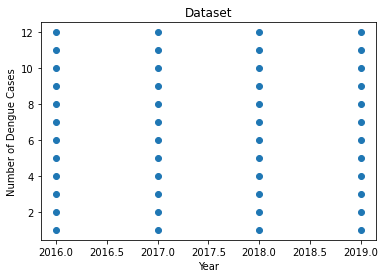

In [7]:
data = genfromtxt('dengue.csv', delimiter=',')

#Extract columns
x = array(data[:,0])
y = array(data[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.title('Dataset')
plt.show()

Defining the hyperparamters

In [8]:
#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

Define cost function

In [9]:
def compute_cost(b, m, data):
    total_cost = 0
    
    # number of datapoints in training data
    N = float(len(data))
    
    # Compute sum of squared errors
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    # Return average of squared error
    return total_cost/(2*N)

Define Gradient Descent functions

In [10]:
def step_gradient(b_current, m_current, data, alpha):
    """takes one step down towards the minima
    
    Args:
        b_current (float): current value of b
        m_current (float): current value of m
        data (np.array): array containing the training data (x,y)
        alpha (float): learning rate / step size
    
    Returns:
        tuple: (b,m) new values of b,m
    """
    
    m_gradient = 0
    b_gradient = 0
    N = float(len(data))

    # Calculate Gradient
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    # Update current m and b
    m_updated = m_current - alpha * m_gradient
    b_updated = b_current - alpha * b_gradient

    #Return updated parameters
    return b_updated, m_updated

def gradient_descent(data, starting_b, starting_m, learning_rate, num_iterations):
    """runs gradient descent
    
    Args:
        data (np.array): training data, containing x,y
        starting_b (float): initial value of b (random)
        starting_m (float): initial value of m (random)
        learning_rate (float): hyperparameter to adjust the step size during descent
        num_iterations (int): hyperparameter, decides the number of iterations for which gradient descent would run
    
    Returns:
        list : the first and second item are b, m respectively at which the best fit curve is obtained, the third and fourth items are two lists, which store the value of b,m as gradient descent proceeded.
    """

    # initial values
    b = starting_b
    m = starting_m
    
    # to store the cost after each iteration
    cost_graph = []
    
    # to store the value of b -> bias unit, m-> slope of line after each iteration (pred = m*x + b)
    b_progress = []
    m_progress = []
    
    # For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, data))
        b, m = step_gradient(b, m, array(data), learning_rate)
        b_progress.append(b)
        m_progress.append(m)
        
    return [b, m, cost_graph,b_progress,m_progress]

Run gradient_descent() to get optimized parameters b and m

In [11]:
b, m, cost_graph,b_progress,m_progress = gradient_descent(data, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, data))

Optimized b: nan
Optimized m: nan
Minimized cost: nan


Plotting the cost per iterations

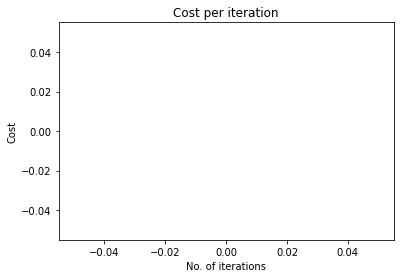

In [12]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Plot line of best fit

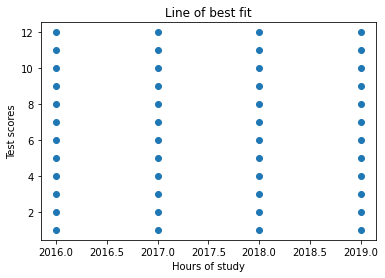

In [13]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

Gradient descent's progress with num of iterations

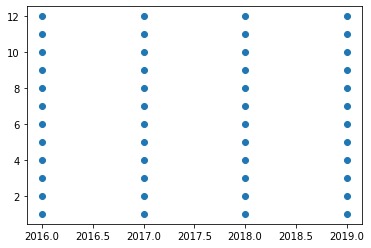

In [14]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111)
b = b_progress[0]
m = m_progress[0]
pred = m*x + b

line = ax.plot(x,pred, '-',c='r')[0]

def animate(i,b_prog,m_prog):
    pred = m_prog[i] * x + b_prog[i]
    line.set_data(x,pred)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(b_progress), fargs=(b_progress,m_progress,))
ax.scatter(x,y)
HTML(ani.to_jshtml())